# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Library untuk Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

# Mengatur style plot
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
# Tentukan lokasi dataset
# Sesuaikan path ini dengan lokasi file di laptop/colab mu
file_path = '../dataset_raw/HR-Employee-Attrition.csv' 

# Membaca dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
print("Dataset Shape:", df.shape)
display(df.head())

Dataset Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Cek Info & Missing Values

In [3]:
#Type your code here
# Cek tipe data dan missing value
df.info()

# Cek jumlah missing value per kolom
print("\nJumlah Missing Value:")
print(df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Visualisasi Target

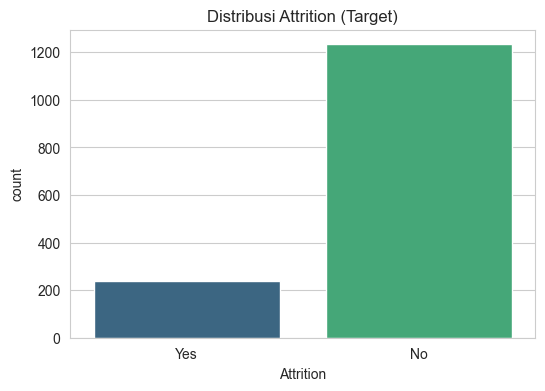

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [4]:
# Melihat distribusi target (Seimbang atau tidak)
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, palette='viridis')
plt.title('Distribusi Attrition (Target)')
plt.show()

# Melihat proporsi dalam persen
print(df['Attrition'].value_counts(normalize=True) * 100)

Analisis Korelasi

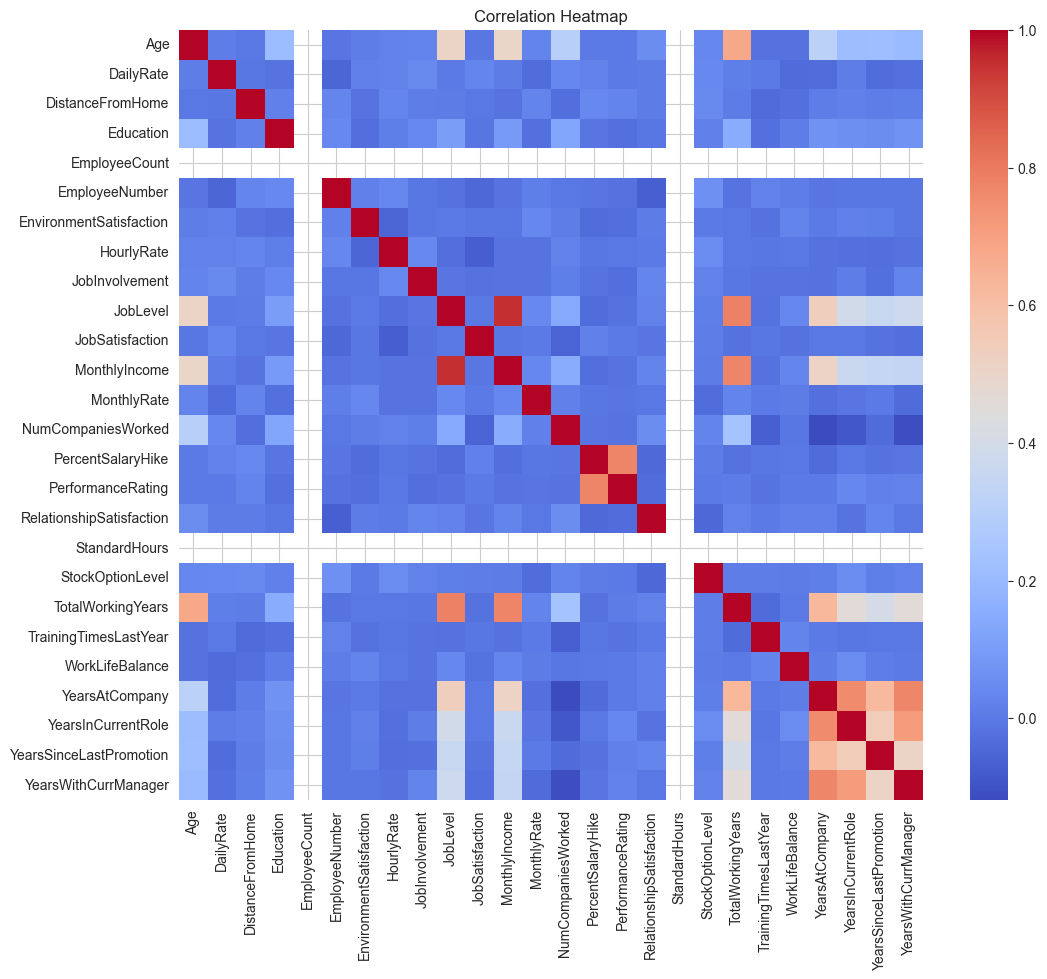

In [5]:
# Melihat korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

DATA CLEANING

In [6]:
# Identifikasi kolom yang hanya punya 1 nilai unik (tidak berguna untuk learning)
nunique = df.nunique()
single_val_cols = nunique[nunique == 1].index.tolist()
print(f"Kolom yang akan dihapus (karena variansi 0): {single_val_cols}")

# Tambahkan EmployeeNumber karena itu hanya ID unik
cols_to_drop = single_val_cols + ['EmployeeNumber']

# Drop kolom
df_clean = df.drop(columns=cols_to_drop)
print(f"Dimensi data setelah drop: {df_clean.shape}")

Kolom yang akan dihapus (karena variansi 0): ['EmployeeCount', 'Over18', 'StandardHours']
Dimensi data setelah drop: (1470, 31)


ENCODING

In [7]:
# Menggunakan LabelEncoder untuk semua kolom kategorikal
label_encoders = {}
categorical_cols = df_clean.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le # Simpan encoder jika nanti perlu inverse transform

print("Data setelah encoding:")
display(df_clean.head())

Data setelah encoding:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


FEATURE SCALING & SPLITTING

In [8]:
# Pisahkan Fitur (X) dan Target (y)
target_col = 'Attrition'
X = df_clean.drop(target_col, axis=1)
y = df_clean[target_col]

# Scaling (Standarisasi) agar rentang nilai sama (misal Gaji vs Umur)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_final = pd.DataFrame(X_scaled, columns=X.columns)

# Split Training dan Testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")

Shape X_train: (1176, 30)
Shape X_test: (294, 30)


SIMPAN HASIL


In [10]:
# Simpan dataset yang sudah bersih ke folder dataset_raw
# Ini nanti akan dipakai oleh script automasi

output_dir = '../dataset_raw' # Sesuaikan path

X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=False)
y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)
X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=False)
y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=False)

print("Data cleaning selesai dan file berhasil disimpan!")

Data cleaning selesai dan file berhasil disimpan!
